In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report


In [2]:
df=pd.read_csv('covid_19_clean_complete.csv')

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [5]:
df.shape

(49068, 10)

In [6]:
df.info

<bound method DataFrame.info of       Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27

In [7]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [8]:
df.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True, errors='ignore')


In [9]:
df.isnull().sum()

Country/Region    0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [10]:
df.columns

Index(['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'WHO Region'],
      dtype='object')

In [11]:
df.describe()

,Confirmed,Deaths,Recovered,Active
count,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


visualizing EDA

In [12]:
import matplotlib.pyplot as plt

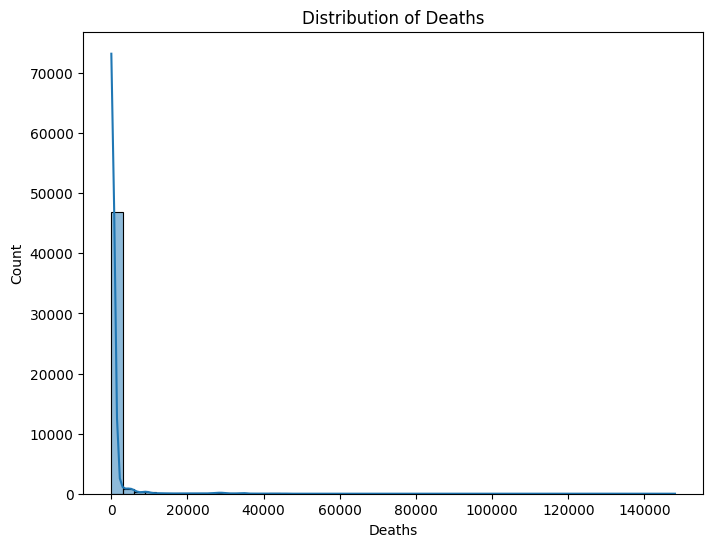

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(df['Deaths'], bins=50, kde=True)
plt.title("Distribution of Deaths")
plt.show()

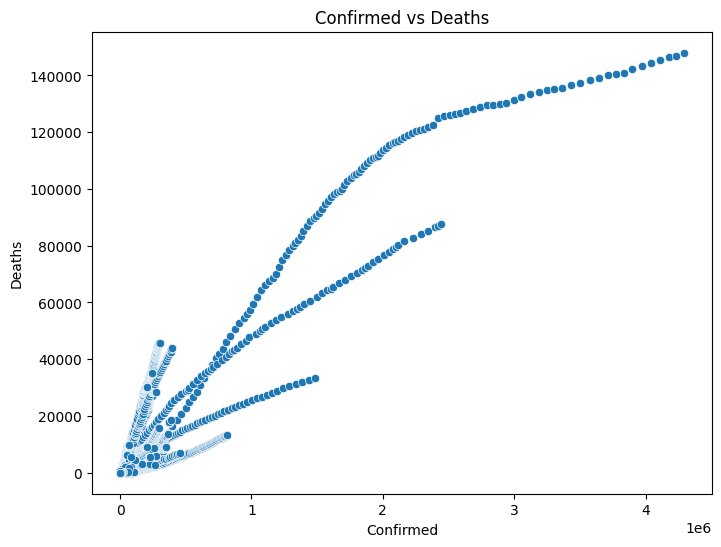

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Confirmed', y='Deaths', data=df)
plt.title("Confirmed vs Deaths")
plt.show()

Encode categorical columns

In [21]:
le_region = LabelEncoder()
df['WHO Region'] = le_region.fit_transform(df['WHO Region'])
df['Country/Region'] = le_region.fit_transform(df['Country/Region'])

In [22]:
X = df[['Confirmed', 'Recovered', 'Active', 'Date', 'WHO Region', 'Country/Region']]
y = df['Deaths']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [24]:
print("\n--- Ridge Regression Results ---")
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


--- Ridge Regression Results ---
R² Score: 0.9989607507983368
RMSE: 218.3857938859594


In [25]:
# Step 9 (Optional): Logistic Regression (if you want classification)
# Convert deaths into categories (e.g., 0 = low, 1 = high)
median_death = df['Deaths'].median()
y_class = (df['Deaths'] > median_death).astype(int)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c, y_train_c)
y_pred_class = log_reg.predict(X_test_c)

In [26]:
print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test_c, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_class))


--- Logistic Regression Results ---
Accuracy: 0.8104748318728348

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82      5060
           1       0.83      0.77      0.80      4754

    accuracy                           0.81      9814
   macro avg       0.81      0.81      0.81      9814
weighted avg       0.81      0.81      0.81      9814

